In [8]:
import time
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
device = torch.device("mps")

In [7]:
torch.manual_seed(1234)
n = 5000
TENSOR_A_CPU = torch.rand(n, n)
TENSOR_B_CPU = torch.rand(n, n)

torch.manual_seed(1234)
TENSOR_A_MPS = torch.rand(n, n).to(device)
TENSOR_B_MPS = torch.rand(n, n).to(device)

# Warm-up
for _ in range(100):
    torch.matmul(torch.rand(500,500).to(device), torch.rand(500,500).to(device))
    
start_time = time.time()
torch.matmul(TENSOR_A_CPU, TENSOR_B_CPU)
cpu_time = time.time() - start_time
print("CPU : --- %s seconds ---" % (cpu_time))

start_time = time.time()
torch.matmul(TENSOR_A_MPS, TENSOR_B_MPS)
mps_time = time.time() - start_time
print("MPS : --- %s seconds ---" % (mps_time))
print(f"{'mps' if mps_time < cpu_time else 'cpu'} WINS")

CPU : --- 0.2019040584564209 seconds ---
MPS : --- 0.00019478797912597656 seconds ---
mps WINS


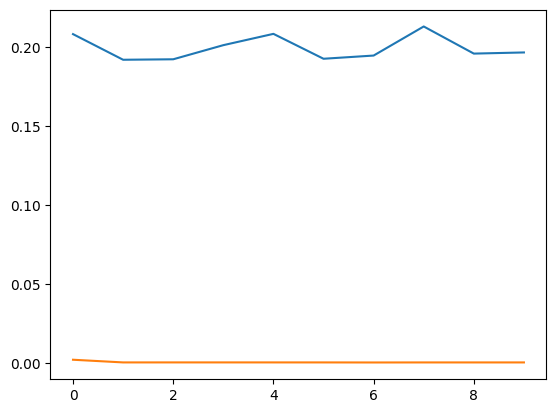

In [24]:
cpu_times = []
mps_times = []

for _ in range(10):
    n = 5000
    TENSOR_A_CPU = torch.rand(n, n)
    TENSOR_B_CPU = torch.rand(n, n)

    torch.manual_seed(1234)
    TENSOR_A_MPS = torch.rand(n, n).to(device)
    TENSOR_B_MPS = torch.rand(n, n).to(device)

    start_time = time.time()
    torch.matmul(TENSOR_A_CPU, TENSOR_B_CPU)
    cpu_time = time.time() - start_time

    start_time = time.time()
    torch.matmul(TENSOR_A_MPS, TENSOR_B_MPS)
    mps_time = time.time() - start_time
    cpu_times.append(cpu_time)
    mps_times.append(mps_time)

plt.plot(cpu_times, label='cpu')
plt.plot(mps_times, label='mps')
